# (Visulization Fordbike Data 2017)
## by (Mostafa Elmehy)
<br>
<br>
Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("2017-fordgobike-tripdata.csv")

In [3]:
df.shape

(519700, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [7]:
df["user_type"].value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [8]:
df["member_gender"].value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

In [9]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender'],
      dtype='object')

In [10]:
df['start_time']=pd.to_datetime(df['start_time'])

In [11]:
df['end_time']=pd.to_datetime(df['end_time'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

There are 519700 trips in the dataset with 15 features ('duration_sec', 'start_time', 'end_time', 'start_station_id',
 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name',
 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender'). Most variables are numeric in nature, but the variables user_type and member_gender which are categorical


### What is/are the main feature(s) of interest in your dataset?

The main interest will be to know which time of the year is the most busy , what is the most popular gender and user type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

start and end time , user type and member gender

## Univariate Exploration


In [13]:
c=sb.color_palette()[0]

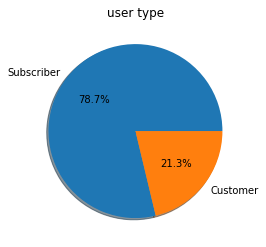

In [14]:
data = df["user_type"].value_counts()
plt.pie(data=df,x=data,labels=data.index,autopct='%1.1f%%',shadow=True);
plt.title("user type");

most of the user types are subscribers

Text(0.5, 1.0, 'member gender')

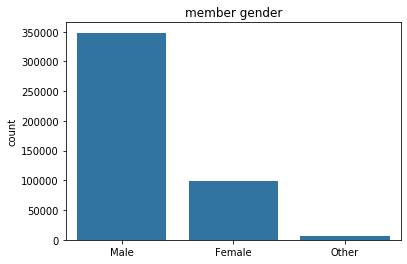

In [16]:
#sb.countplot(data=df,x="member_gender",color=c);
sb.countplot(x=df["member_gender"],color=c);
plt.xlabel("")
plt.title("member gender")

Most of the users are males

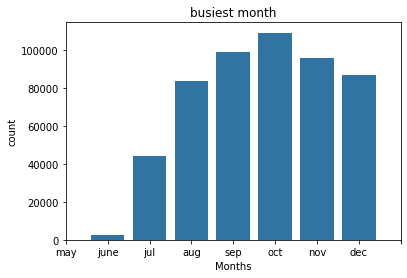

In [20]:
months = df['start_time'].dt.month
order = []
for i in range(1,13):
    order.append(i)
#sb.countplot(x=months,order=order,color=c)
sb.countplot(data=df,x=months,order=order,color=c)
plt.xlabel("Months")
plt.xlim([4,12])
plt.xticks([4,5,6,7,8,9,10,11,12],["may","june","jul","aug","sep","oct","nov","dec"]);
plt.title("busiest month");

october is the busiest month

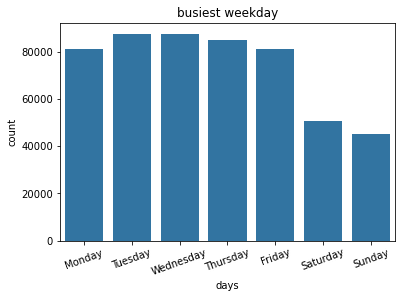

In [18]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df,x=df['start_time'].dt.day_name(),color=c,order=weekday);
plt.title("busiest weekday")
plt.xlabel("days")
plt.xticks(rotation=20);

wednesday and tuesday are the busiest days 

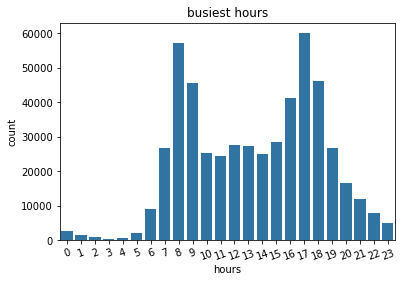

In [19]:
sb.countplot(data=df,x=df['start_time'].dt.hour,color=c);
plt.title("busiest hours")
plt.xlabel("hours")
plt.xticks(rotation=20);

As expected the distribution is bimodal The two peaks are during the normal rush hours of a day

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the distributions we found were expected. From the majority users being subscribers, to the busiest hours being during the rush hour time of the day and we found that the busiest month is october

## Bivariate Exploration


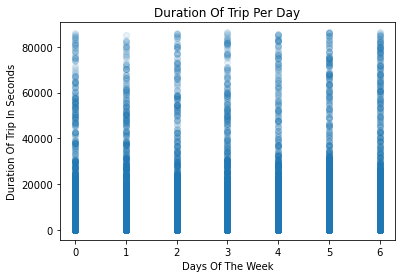

In [20]:
plt.scatter(data = df , x = df['start_time'].dt.dayofweek , y='duration_sec',alpha=1/10)
plt.title('Duration Of Trip Per Day')
plt.xlabel('Days Of The Week')
plt.ylabel('Duration Of Trip In Seconds');

The distrution is not as expected. Thursday seem like the day where people take the longest trips. And the weekends are the days where people take the shortest trips on average

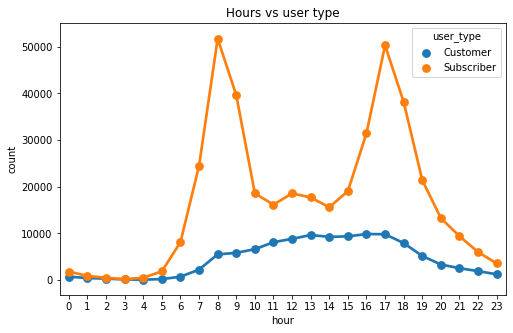

In [22]:
df_ = df
df_["hour"]=df['start_time'].dt.hour
data=df_.groupby(["hour","user_type"]).size().reset_index()
plt.figure(figsize=(8, 5))
sb.pointplot(data=data,x="hour",hue="user_type",y=0)
plt.title("Hours vs user type");
plt.ylabel("count");

In the first hours of the day there is no a big diffrence but after that specially in the rush hours the diffrence become very big

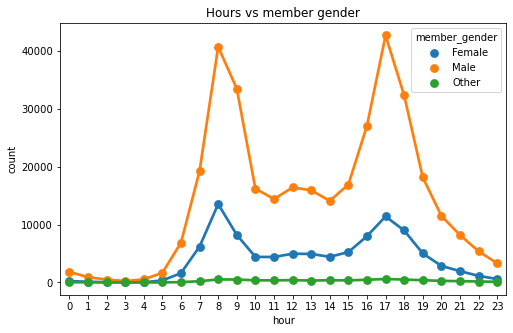

In [22]:
data=df_.groupby(["hour","member_gender"]).size().reset_index()
plt.figure(figsize=(8, 5))
sb.pointplot(data=data,x="hour",hue="member_gender",y=0)
plt.title("Hours vs member gender");
plt.ylabel("count");

In the first hours of the day there is no a big diffrence but after it become very obvious that the males is the most users

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

it became very obvious that the males and subscribers are the most users and the rush hours are very clear in the graphs 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

the rush hours and ride bikes number

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

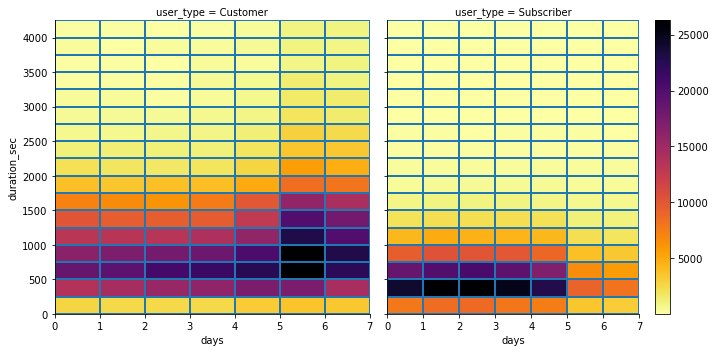

In [23]:
xbin = np.arange(0,7+1,1)
ybin = np.arange(0,4200+250,250)
df_new = df
df_new["days"] = df_new['start_time'].dt.dayofweek
g = sb.FacetGrid (data = df_new , col='user_type', height=5)
g.map(plt.hist2d, 'days', 'duration_sec', cmin=0.5, cmap = 'inferno_r', bins=[xbin,ybin])
plt.colorbar();


From this heatmap we can similarities between customers and subscribers. We can see that both have an average of 4 and 12 min rides during the week. However customers are not only more present during the weekend they take longer trips as well.

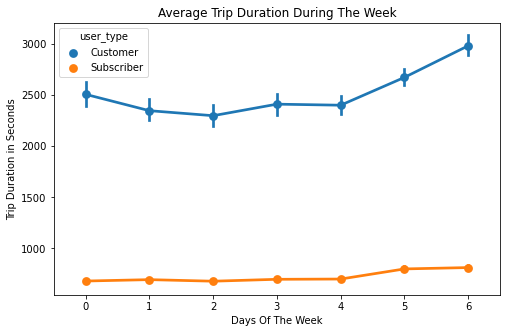

In [24]:
plt.figure(figsize=(8, 5))
ax = sb.pointplot(data=df_new, x='days' , y='duration_sec', hue='user_type')
plt.xlabel('Days Of The Week')
plt.ylabel('Trip Duration in Seconds')
plt.title('Average Trip Duration During The Week');

This graph is as expected where the duration for a trip is longer during the weekends than weekdays.

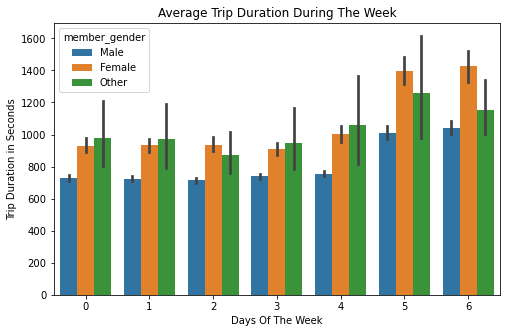

In [25]:
plt.figure(figsize=(8, 5))
ax = sb.barplot(data=df_new, x='days' , y='duration_sec', hue='member_gender')
plt.xlabel('Days Of The Week')
plt.ylabel('Trip Duration in Seconds')
plt.title('Average Trip Duration During The Week');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This section enhanced the previous topics of data exploration through different visuals and adding in more variables to compare to other variables. Plotting a heatmap of demand of the bikes throughout the day on a weekly basis shed a new light on the time based discussion on when and what time each user group uses the bike sharing system and the customers and females spend more time that the others